In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [2]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

## Lorenz Equations and Chaotic Behavior 

One primary characteristic of chaos is that small changes in initial conditions result in large changes over time in the solution curves for a dynamic system. 

Here I implement the Lorenz equations: 

$x_t = \sigma (y - x), y_t = \rho x - y - xz, z_t = xy - \beta z$

where $x_t$ indicates the derivative of $x$ wrt $t$ and $\sigma, \rho,$ and $\beta$ are constants. 

For appropriately chosen values of $\sigma, \rho,$ and $\beta$ the solutions did not tend to a fixed pooint, nor did the system tend to toward infnity either - there was chaotic behavior, and the system exhibited a "strange attractor."

Here we'll let $\sigma = 10$, $\rho = 28$, $\beta = 8$ and use `scipy.integrate.odeint` to compute the solution.

In [ ]:
def lorenz(t, x):
    """
    Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    x, y, z = x[0], x[1], x[2]  
    sigma, rho, beta = 10, 28, 8/3 
    return np.array([sigma * (y - x), (rho * x) - y - (x * z), (x * y) - (beta * z)])        

In [ ]:
# initial values 
initial_vals = np.random.uniform(-15, 15, (3, ))  

# solve the ODE 
sol = solve_ivp(lorenz, (0, 40), y0 = initial_vals, t_eval = np.linspace(0, 40, 5000))     
x, y, z = sol.y[0], sol.y[1], sol.y[2]       

<IPython.core.display.Javascript object>


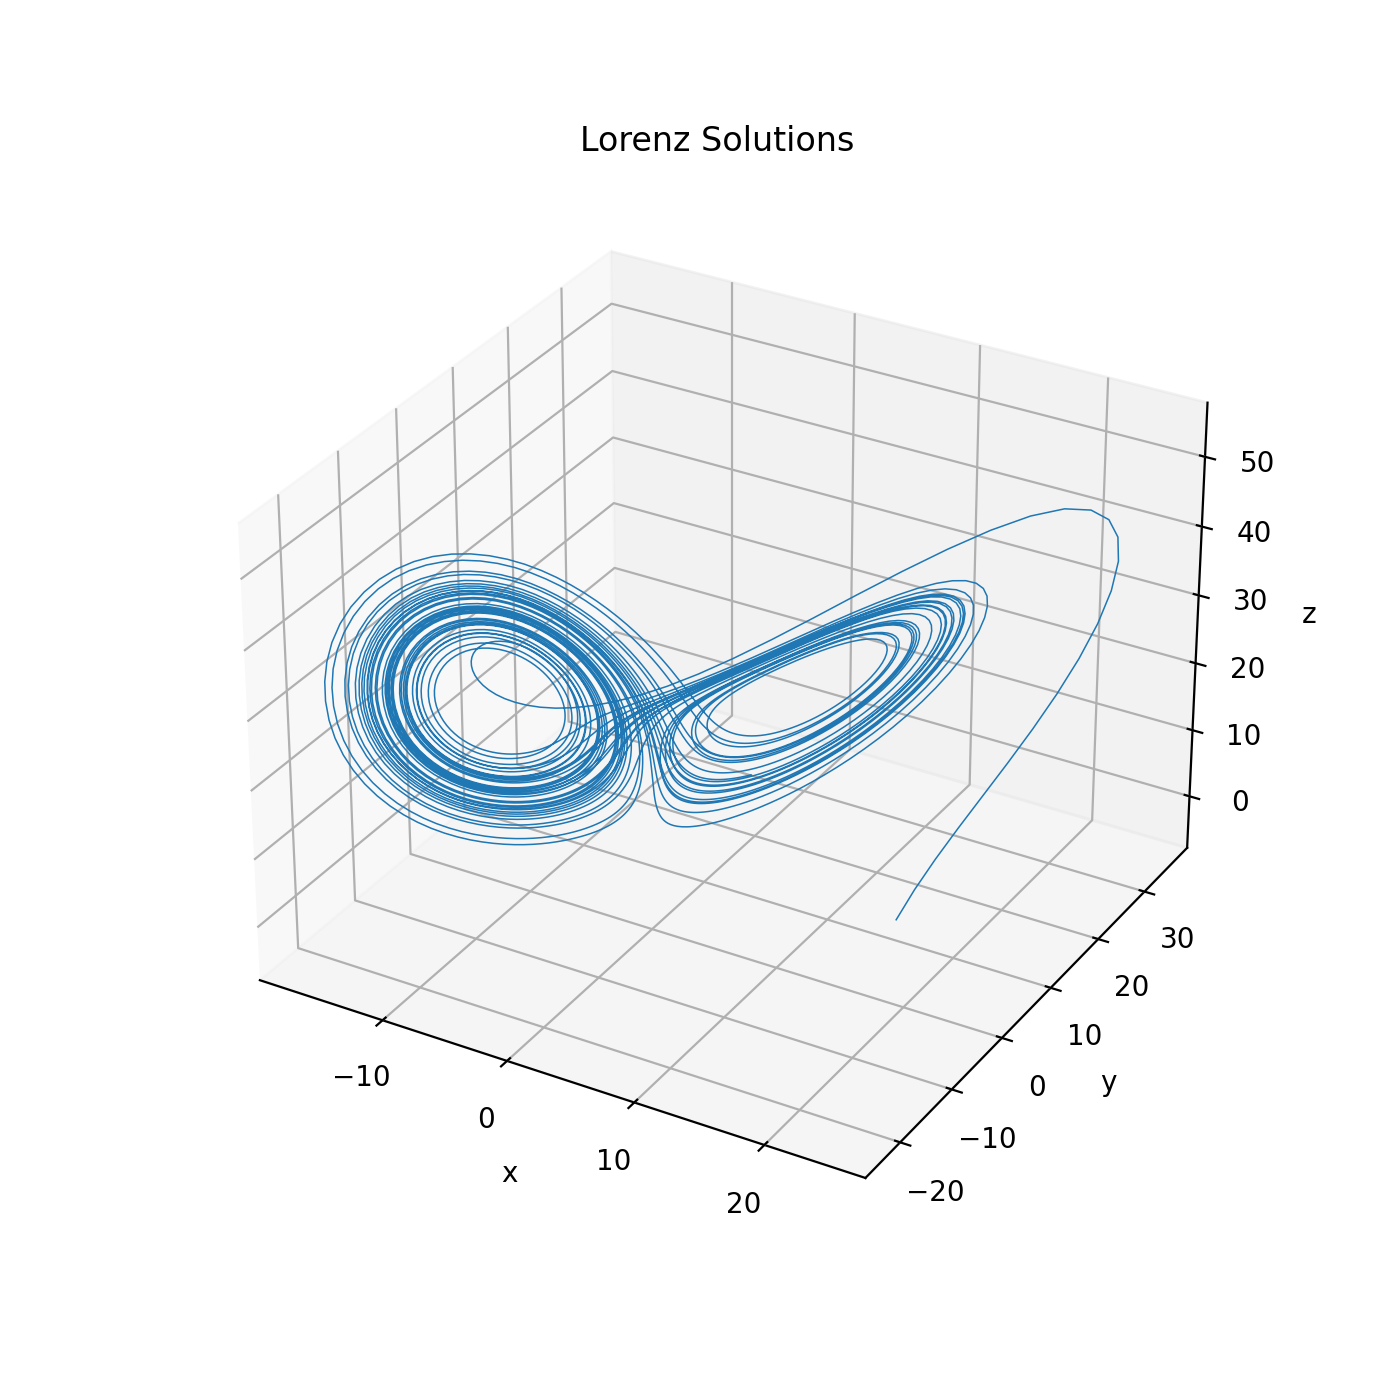

In [ ]:
# init plot figure 
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection = '3d')

ax.set_title("Lorenz Solutions") 
ax.set_xlabel("x")
ax.set_ylabel("y") 
ax.set_zlabel("z")

# plot solution 
line3d, = plt.plot(x, y, z, lw = .55) 
plt.show()

To better visualize the Lorenz attractor, I'll plot 3 solutions to the system with randomly saampled initial conditions.

<IPython.core.display.Javascript object>


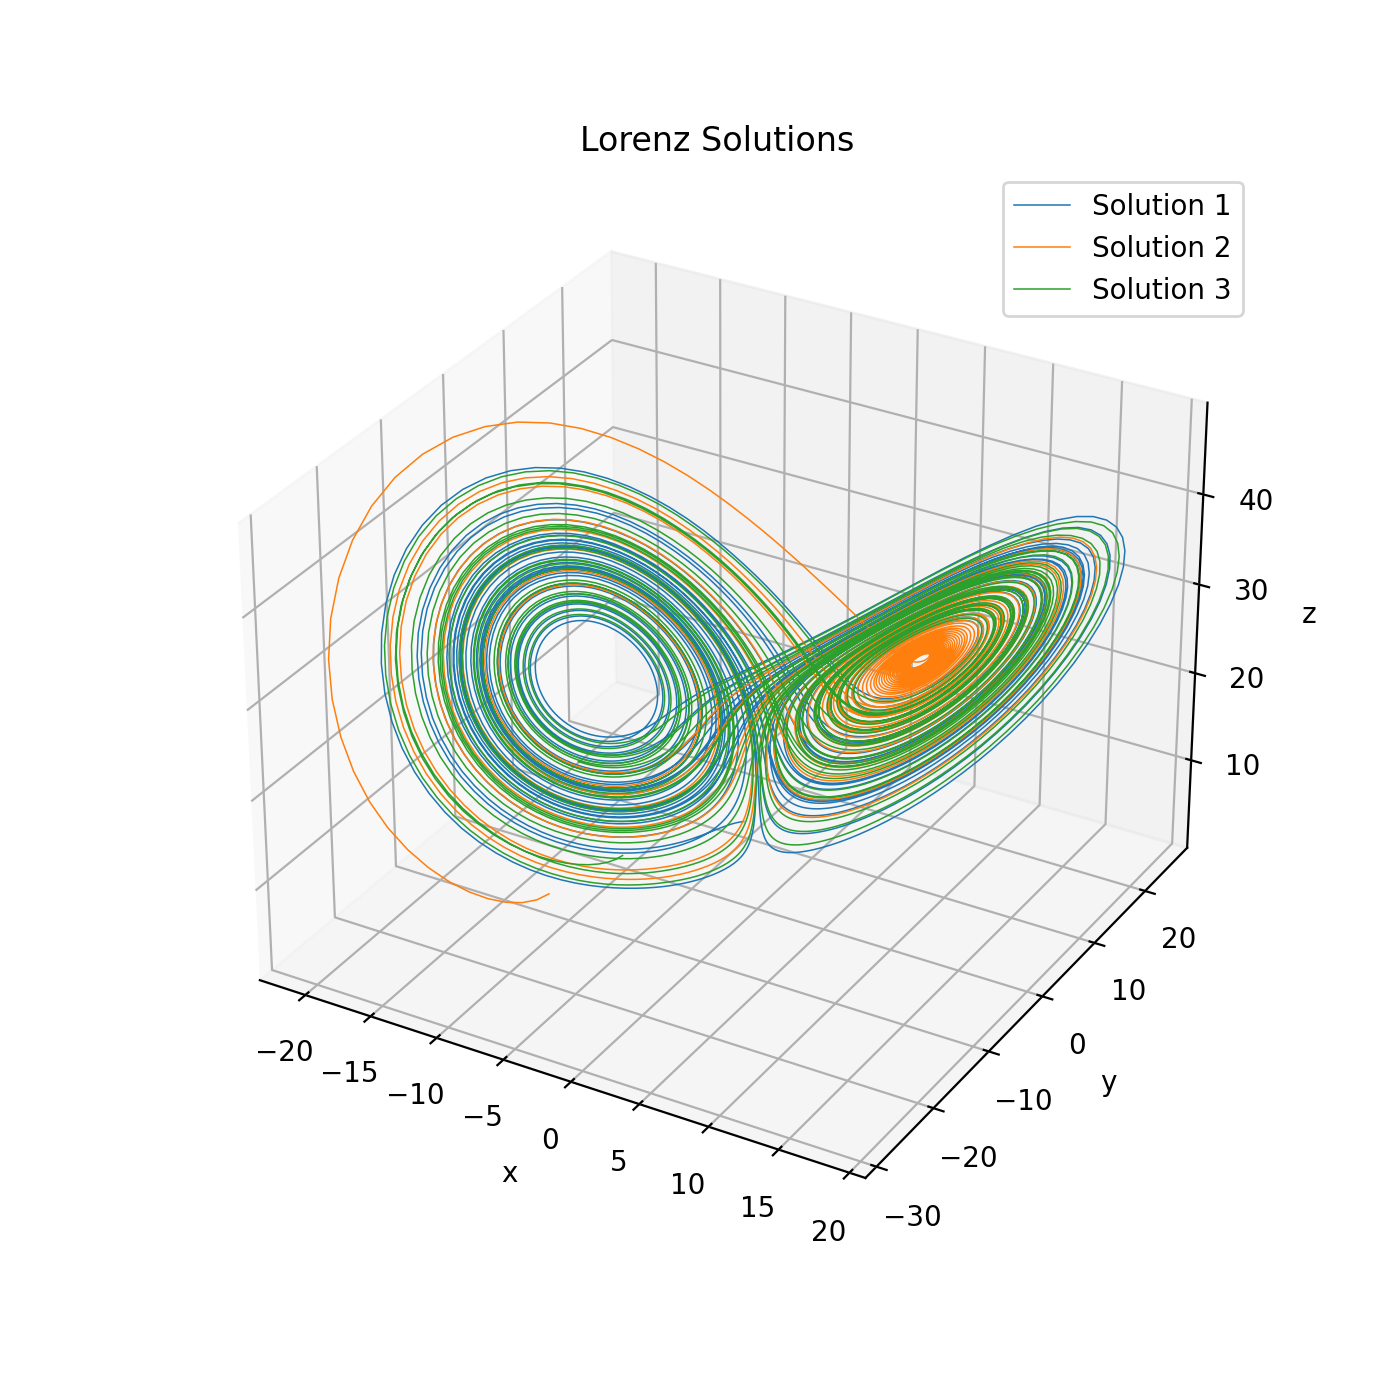

In [ ]:
# init plot figure 
fig = plt.figure(figsize = (7, 7)) 
ax = fig.add_subplot(111, projection = '3d')

# add titles and axes 
ax.set_title("Lorenz Solutions") 
ax.set_xlabel("x")
ax.set_ylabel("y") 
ax.set_zlabel("z")

for i in range(3): 

    # randomllly initial values 
    initial_vals = np.random.uniform(-15, 15, (3, ))  

    # solve the ODE 
    sol = solve_ivp(lorenz, (0, 40), y0 = initial_vals, t_eval = np.linspace(0, 40, 5000))     
    x, y, z = sol.y[0], sol.y[1], sol.y[2]     
    
    # plot solution
    line3d, = plt.plot(x, y, z, lw = .55, label = "Solution {}".format(i + 1))  

# set limits 
plt.legend() 
plt.show()

Herre I use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, I'll draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation by sampling from `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation is saved as `lorenz_animation1.mp4`.

`<video src='lorenz_animation1.mp4' controls>`

In [ ]:
init_cond = np.random.uniform(-15, 15, (3, )) 
init_cond2 = init_cond + np.random.randn(3)*(1e-10)      

# load data, init animation 
animation.writer = animation.writers["ffmpeg"]  
plt.ioff()

# init plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d") 

# set titles 
ax.set_title("Lorenz Equations With Perturbation")  
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z") 

# init plotting for line3d objects 
initial, = plt.plot([], [], "bo", lw = 3, label = "Initial Solution")   
initial_traj, = plt.plot([], [], "b") 
perturb, = plt.plot([], [], "r", lw = 0.45, label = "Perturbation") 
perturb_traj, = plt.plot([], [], "r")
plt.legend()

# solutions to Lorenz equations 
sol1 = solve_ivp(lorenz, (0, 80), y0 = init_cond, t_eval = np.linspace(0, 80, 10000))  
sol2 = solve_ivp(lorenz, (0, 80), y0 = init_cond2, t_eval = np.linspace(0, 80, 10000))    

def update(i):  
    # update function for plotting 
    initial.set_data(sol1.y[0, i], sol1.y[1, i]) 
    initial.set_3d_properties(0)
    
    perturb.set_data(sol2.y[0, i], sol2.y[1, i]) 
    perturb.set_3d_properties(0)  
    
    initial_traj.set_data(sol1.y[0, :i + 1], sol1.y[1, :i + 1]) 
    initial_traj.set_3d_properties(0)
    
    perturb_traj.set_data(sol2.y[0, :i + 1], sol2.y[1, :i + 1])  
    perturb_traj.set_3d_properties(0)  
    
    return [initial, initial_traj, perturb, perturb_traj]  


# plotting on max, min limits of each x, y, z dimensions
ax.set_xlim((min(min(sol1.y[0]), min(sol2.y[0])) - 3, max(max(sol1.y[0]), max(sol2.y[0])) + 3)) 
ax.set_ylim((min(min(sol1.y[1]), min(sol2.y[1])) - 3, max(max(sol1.y[1]), max(sol2.y[1])) + 3)) 
ax.set_zlim((0, 5))   
plt.legend() 

ani = animation.FuncAnimation(fig, update, frames = range(750), interval = 25)  
ani.save("lorenz_animation1.mp4")  
plt.ion() 

The Lyapunov exponent of a dynamical system is one measure of how chaotic a system is. While
there are more conditions for a system to be considered chaotic, one of the primary indicators of
a chaotic system is extreme sensitivity to initial conditions. Strictly speaking, this is saying that
a chaotic system is poorly conditioned. In a chaotic system, the sensitivity to changes in initial
conditions depends expoentially on the time the system is allowed to evolve. If δ(t) represents the
dierence between two solution curves, when δ(t) is small, the following approximation holds

||δ(t)|| ∼ ||δ(0)|| $e^{\lambda t}$


where λ is a constant called the Lyapunov exponent. In other words, log(||δ(t)||) is approximately linear as a function of time, with slope λ, so we can estimate this through linear regression.

In [ ]:
# init solution to find point in attractor 
sol1 = solve_ivp(lorenz, (0, 50), y0 = init_cond, t_eval = np.linspace(0, 10, 5000)) 
init_cond = np.array([sol1.y[0][-1], sol1.y[1][-1], sol1.y[2][-1]]) 
# add perturbation to other initial condition 
init_cond2 = init_cond + (np.random.randn(3)*(1e-10)) 

# find two solutions to initial value problems 
sol1 = solve_ivp(lorenz, (0, 10), y0 = init_cond, t_eval = np.linspace(0, 10, 5000)) 
sol2 = solve_ivp(lorenz, (0, 10), y0 = init_cond2, t_eval = np.linspace(0, 10, 5000)) 

# take norm 
normed_sol = np.linalg.norm(sol1.y - sol2.y, axis = 0)  

In [ ]:
# fit linear regression 
reg = linregress(np.linspace(0, 10, 5000), np.log(normed_sol)) 
slope, intercept = reg[0], reg[1] 
 
print(slope)    

0.9234478827176315


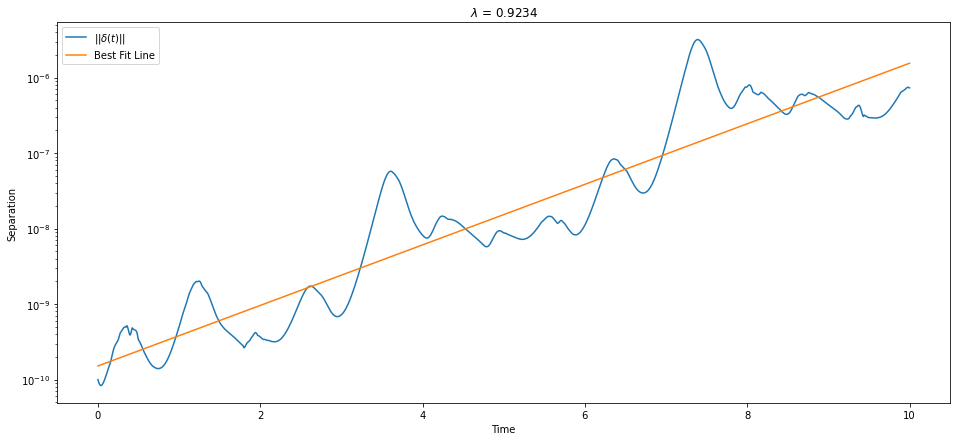

In [ ]:
# plot normed values and line of best fit 
plt.figure(figsize = (16, 7))
t = np.linspace(0, 10, 5000)
plt.semilogy(t, normed_sol, label = r"$||\delta (t)||$")
plt.semilogy(t, np.exp(intercept + (slope * t)), label = "Best Fit Line") 
plt.title("$\lambda$ = {:.4f}".format(slope))
plt.ylabel("Separation") 
plt.xlabel("Time") 
plt.legend()
plt.show()